# Be creative by using Foursquare location data

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 92kB 15.2MB/s eta 0:00:01
Folium installed
Libraries imported.


# My project consists coffee franchise dominance comparison of cities: Seattle vs Vancouver BC

Every centralized public libraries strategically located in the center of the major pedestrian shopping and office area, where busy stores would flourish. This project is to determine how coffee industries dominant by franchises within centralized area.

### Let's start by converting the Seattle Public Library-Central address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

In [2]:
address = '1000 4th Ave, Seattle, WA 98104'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Seattle Public Library Central Address Latitude is ',latitude,' and Longtitude is ', longitude)

Seattle Public Library Central Address Latitude is  47.6067142  and Longtitude is  -122.332698325461


## 1. Search for a specific venue category in Seattle

To determine local coffee shop vs franchise coffee shop in Seattle and Vancouver BC based on 500 radius from central library of its cities.

In [3]:
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')

coffee .... OK!


#### Define the corresponding URL

In [4]:
CLIENT_ID = 'CFJUPZ2JRZYBDVOJOTG1AF0KMBCCT4LOZJORX5UCKEE3YAGE' # your Foursquare ID
CLIENT_SECRET = 'VI5OBMLPPDJ1MPZDMZQAATI4UOY4NKQD12MQL3B21MGMDJXT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('My Foursqaure credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My Foursqaure credentails:
CLIENT_ID: CFJUPZ2JRZYBDVOJOTG1AF0KMBCCT4LOZJORX5UCKEE3YAGE
CLIENT_SECRET:VI5OBMLPPDJ1MPZDMZQAATI4UOY4NKQD12MQL3B21MGMDJXT


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=CFJUPZ2JRZYBDVOJOTG1AF0KMBCCT4LOZJORX5UCKEE3YAGE&client_secret=VI5OBMLPPDJ1MPZDMZQAATI4UOY4NKQD12MQL3B21MGMDJXT&ll=47.6067142,-122.332698325461&v=20180604&query=coffee&radius=500&limit=100'

#### Send the GET Request and examine the results

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df06a0e6001fe001ca2f569'},
 'response': {'venues': [{'id': '52d456c811d24128cdd7bc8b',
    'name': 'Storyville Coffee Company',
    'location': {'address': '1001 1st Ave',
     'crossStreet': 'at Madison St',
     'lat': 47.60475923205166,
     'lng': -122.33636210125788,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.60475923205166,
       'lng': -122.33636210125788}],
     'distance': 350,
     'postalCode': '98104',
     'cc': 'US',
     'city': 'Seattle',
     'state': 'WA',
     'country': 'United States',
     'formattedAddress': ['1001 1st Ave (at Madison St)',
      'Seattle, WA 98104',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1576036875'

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,52d456c811d24128cdd7bc8b,1001 1st Ave,US,Seattle,United States,at Madison St,350,"[1001 1st Ave (at Madison St), Seattle, WA 981...","[{'label': 'display', 'lat': 47.60475923205166...",47.604759,-122.336362,NaN,98104,WA,Storyville Coffee Company,v-1576036875,NaN
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,49d3e558f964a520225c1fe3,103 Cherry St,US,Seattle,United States,at 1st Ave,452,"[103 Cherry St (at 1st Ave), Seattle, WA 98104...","[{'label': 'display', 'lat': 47.6027673689831,...",47.602767,-122.334151,Seattle Central Business District,98104,WA,Cherry Street Coffee House,v-1576036875,NaN
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,55fc6351498e081c6ae9a9c1,602 2nd Ave,US,Seattle,United States,James St,494,"[602 2nd Ave (James St), Seattle, WA 98104, Un...","[{'label': 'display', 'lat': 47.60226958101576...",47.602270,-122.332549,NaN,98104,WA,Slate Coffee,v-1576036875,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b5daa3ff964a520cc6529e3,1218 3rd Ave,US,Seattle,United States,at Seneca St,254,"[1218 3rd Ave (at Seneca St), Seattle, WA 9810...","[{'label': 'display', 'lat': 47.60755521415362...",47.607555,-122.335845,NaN,98101,WA,Pegasus Coffee,v-1576036875,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,56fecbc2498e190dff650557,NaN,US,Seattle,United States,NaN,408,"[Seattle, WA, United States]","[{'label': 'display', 'lat': 47.610033, 'lng':...",47.610033,-122.335019,NaN,NaN,WA,Peet's Coffee & Tea,v-1576036875,NaN


#### Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Storyville Coffee Company,Coffee Shop,1001 1st Ave,US,Seattle,United States,at Madison St,350,"[1001 1st Ave (at Madison St), Seattle, WA 981...","[{'label': 'display', 'lat': 47.60475923205166...",47.604759,-122.336362,NaN,98104,WA,52d456c811d24128cdd7bc8b
1,Cherry Street Coffee House,Coffee Shop,103 Cherry St,US,Seattle,United States,at 1st Ave,452,"[103 Cherry St (at 1st Ave), Seattle, WA 98104...","[{'label': 'display', 'lat': 47.6027673689831,...",47.602767,-122.334151,Seattle Central Business District,98104,WA,49d3e558f964a520225c1fe3
2,Slate Coffee,Coffee Shop,602 2nd Ave,US,Seattle,United States,James St,494,"[602 2nd Ave (James St), Seattle, WA 98104, Un...","[{'label': 'display', 'lat': 47.60226958101576...",47.602270,-122.332549,NaN,98104,WA,55fc6351498e081c6ae9a9c1
3,Pegasus Coffee,Coffee Shop,1218 3rd Ave,US,Seattle,United States,at Seneca St,254,"[1218 3rd Ave (at Seneca St), Seattle, WA 9810...","[{'label': 'display', 'lat': 47.60755521415362...",47.607555,-122.335845,NaN,98101,WA,4b5daa3ff964a520cc6529e3
4,Peet's Coffee & Tea,Coffee Shop,NaN,US,Seattle,United States,NaN,408,"[Seattle, WA, United States]","[{'label': 'display', 'lat': 47.610033, 'lng':...",47.610033,-122.335019,NaN,NaN,WA,56fecbc2498e190dff650557


#### Let's visualize the coffee shop that are nearby

In [9]:
dataframe_filtered.name

0                             Storyville Coffee Company
1                            Cherry Street Coffee House
2                                          Slate Coffee
3                                        Pegasus Coffee
4                                   Peet's Coffee & Tea
5                                        Pegasus Coffee
6                            Cherry Street Coffee House
7                                          Retro Coffee
8                                 Seattle's Best Coffee
9                            Tully's Coffee - Two Union
10                                          Coffee Tree
11    Seattles Best Coffee - Retail Cafes, Downtown ...
12                            Liberty Mutual Coffee Bar
13                                          Voxx Coffee
14                                   Honor Coffee & Tea
15                                        Benaroya Hall
16                           Cherry Street Coffee House
17                                          Made

### Let's set the datagframe to count by business name

In [10]:
df_name = dataframe_filtered.groupby(['name'])
df_count = df_name.count()
df_count_show = {'Count':df_count['categories']}
df_show = pd.DataFrame(data=df_count_show)
df_show


,Count
name,
Benaroya Hall,1
Best Of Seattle,1
Boyds Coffee Stores,1
Cherry Street Coffee House,3
Coffee Tree,1
Dollop Coffee Co.,1
Fonté Café & Wine Bar,1
Gloria Jean's Coffee Bean,1
Honor Coffee & Tea,1


In [11]:
total_rows = dataframe_filtered['name'].shape[0]
print ('Total numbers of Seattle Coffee Shops found in 500 radius : ', total_rows)

Total numbers of Seattle Coffee Shops found in 500 radius :  37


In [12]:
import matplotlib.pyplot as plt
viz_seattle = df_show.plot(kind='bar')

plt.xlabel("Coffee Shops")
plt.ylabel("Counts")
plt.title("Total Seattle Coffee Shops")

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(3, 3),             # place head of the arrow at point (Highest count , pop 3)
             xytext=(21, 7),         # place base of the arrow at point (Highest count , pop 3)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='coral', lw=2)
            )

viz_seattle

In [13]:
ps = (7/total_rows)
pc = (3/total_rows)
pp = (2/total_rows)
print("Percentage of Starbucks Coffee is :"+"{:.2%}".format(ps));
print("Percentage of Cherry Street Coffee is :"+"{:.2%}".format(pc));
print("Percentage of Pegasus Coffee House is :"+"{:.2%}".format(pp));
print("Percentage of Remained Seattle Coffee Shops are :"+"{:.2%}".format((total_rows-12)/total_rows))

Percentage of Starbucks Coffee is :18.92%
Percentage of Cherry Street Coffee is :8.11%
Percentage of Pegasus Coffee House is :5.41%
Percentage of Remained Seattle Coffee Shops are :67.57%


Create visual map to locate coffee shops

In [14]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Central Public Library
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Seattle Public Library',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Let's start by converting the Central Library | Vancouver Public Library address to its latitude and longitude coordinates.

In [15]:
address_bc = '350 W Georgia St, Vancouver, BC'


geolocator_bc = Nominatim(user_agent="foursquare_agent")
location_bc = geolocator.geocode(address_bc)
latitude_bc = location_bc.latitude
longitude_bc = location_bc.longitude
print('Vancouver Public Library Central Address Latitude is ',latitude_bc,' and Longtitude is ', longitude_bc)

Vancouver Public Library Central Address Latitude is  49.27965895  and Longtitude is  -123.115613990152


## 2. Search for a specific venue category in BC

In [16]:
search_query_bc = 'coffee'
radius_bc = 500
print(search_query_bc + ' .... OK!')

coffee .... OK!


#### Define the corresponding URL

In [17]:
url_bc = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_bc, longitude_bc, VERSION, search_query_bc, radius_bc, LIMIT)
url_bc

'https://api.foursquare.com/v2/venues/search?client_id=CFJUPZ2JRZYBDVOJOTG1AF0KMBCCT4LOZJORX5UCKEE3YAGE&client_secret=VI5OBMLPPDJ1MPZDMZQAATI4UOY4NKQD12MQL3B21MGMDJXT&ll=49.27965895,-123.115613990152&v=20180604&query=coffee&radius=500&limit=100'

#### Send the GET Request and examine the results

In [18]:
results_bc = requests.get(url_bc).json()
results_bc

{'meta': {'code': 200, 'requestId': '5df06a0014a126001bd8fc21'},
 'response': {'venues': [{'id': '4aa75811f964a520bd4c20e3',
    'name': 'Trees Organic Coffee',
    'location': {'address': '450 Granville St.',
     'crossStreet': 'btwn W. Hastings & W. Pender St.',
     'lat': 49.28492513095138,
     'lng': -123.11446725654999,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.28492513095138,
       'lng': -123.11446725654999}],
     'distance': 592,
     'postalCode': 'V6C 1V4',
     'cc': 'CA',
     'city': 'Vancouver',
     'state': 'BC',
     'country': 'Canada',
     'formattedAddress': ['450 Granville St. (btwn W. Hastings & W. Pender St.)',
      'Vancouver BC V6C 1V4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-15

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [19]:
# assign relevant part of JSON to venues
venues_bc = results_bc['response']['venues']

# tranform venues into a dataframe
dataframe_bc = json_normalize(venues_bc)
dataframe_bc.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4aa75811f964a520bd4c20e3,450 Granville St.,CA,Vancouver,Canada,btwn W. Hastings & W. Pender St.,592,[450 Granville St. (btwn W. Hastings & W. Pend...,"[{'label': 'display', 'lat': 49.28492513095138...",49.284925,-123.114467,V6C 1V4,BC,Trees Organic Coffee,v-1576036877
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b169b7bf964a520d8ba23e3,100 - 900 Howe St,CA,Vancouver,Canada,at Smithe St,529,"[100 - 900 Howe St (at Smithe St), Vancouver B...","[{'label': 'display', 'lat': 49.28079271339729...",49.280793,-123.122699,V6Z 2M4,BC,Waves Coffee House,v-1576036877
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4d8a73795ecdf04df55fbf8a,211 Robson St,CA,Vancouver,Canada,at Cambie St,147,"[211 Robson St (at Cambie St), Vancouver BC V6...","[{'label': 'display', 'lat': 49.27836153513856...",49.278362,-123.115227,V6B 0E7,BC,Waves Coffee House,v-1576036877
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b17f803f964a52083ca23e3,495 West Georgia,CA,Vancouver,Canada,at Richards St,167,"[495 West Georgia (at Richards St), Vancouver ...","[{'label': 'display', 'lat': 49.281144112765, ...",49.281144,-123.115973,V6B 1B3,BC,Blenz Coffee,v-1576036877
4,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",False,4aa73d64f964a520734c20e3,353 W Pender St,CA,Vancouver,Canada,at Homer St,433,"[353 W Pender St (at Homer St), Vancouver BC V...","[{'label': 'display', 'lat': 49.28272404338896...",49.282724,-123.111941,V6B 1T3,BC,Finch’s Tea & Coffee House,v-1576036877


#### Define information of interest and filter dataframe


In [20]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_bc = ['name', 'categories'] + [col for col in dataframe_bc.columns if col.startswith('location.')] + ['id']
dataframe_filtered_bc = dataframe_bc.loc[:, filtered_columns_bc]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_bc['categories'] = dataframe_filtered_bc.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_bc.columns = [column.split('.')[-1] for column in dataframe_filtered_bc.columns]

dataframe_filtered_bc.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Trees Organic Coffee,Café,450 Granville St.,CA,Vancouver,Canada,btwn W. Hastings & W. Pender St.,592,[450 Granville St. (btwn W. Hastings & W. Pend...,"[{'label': 'display', 'lat': 49.28492513095138...",49.284925,-123.114467,V6C 1V4,BC,4aa75811f964a520bd4c20e3
1,Waves Coffee House,Coffee Shop,100 - 900 Howe St,CA,Vancouver,Canada,at Smithe St,529,"[100 - 900 Howe St (at Smithe St), Vancouver B...","[{'label': 'display', 'lat': 49.28079271339729...",49.280793,-123.122699,V6Z 2M4,BC,4b169b7bf964a520d8ba23e3
2,Waves Coffee House,Coffee Shop,211 Robson St,CA,Vancouver,Canada,at Cambie St,147,"[211 Robson St (at Cambie St), Vancouver BC V6...","[{'label': 'display', 'lat': 49.27836153513856...",49.278362,-123.115227,V6B 0E7,BC,4d8a73795ecdf04df55fbf8a
3,Blenz Coffee,Coffee Shop,495 West Georgia,CA,Vancouver,Canada,at Richards St,167,"[495 West Georgia (at Richards St), Vancouver ...","[{'label': 'display', 'lat': 49.281144112765, ...",49.281144,-123.115973,V6B 1B3,BC,4b17f803f964a52083ca23e3
4,Finch’s Tea & Coffee House,Sandwich Place,353 W Pender St,CA,Vancouver,Canada,at Homer St,433,"[353 W Pender St (at Homer St), Vancouver BC V...","[{'label': 'display', 'lat': 49.28272404338896...",49.282724,-123.111941,V6B 1T3,BC,4aa73d64f964a520734c20e3


dataframe_filtered.name

In [21]:
dataframe_filtered_bc.name

0                    Trees Organic Coffee
1                      Waves Coffee House
2                      Waves Coffee House
3                            Blenz Coffee
4              Finch’s Tea & Coffee House
5                            Blenz Coffee
6                            Blenz Coffee
7                      Waves Coffee House
8                            Blenz Coffee
9                   My Cup Coffee and Tea
10                           Blenz Coffee
11                           Blenz Coffee
12                Pacific coffee Roasters
13                       Coffee Incognito
14               Rocanini Coffee Roasters
15                         Quantum Coffee
16              Republica Coffee Roasters
17                     7 Days Coffee Shop
18                           Blenz Coffee
19                  Cultured Coffee & Tea
20    Fresh & Reddy Office Coffee Company
21                              Starbucks
22                              Starbucks
23                              St

### Let's set the datagframe to count by business name

In [22]:
df_name_bc = dataframe_filtered_bc.groupby(['name'])
df_count_bc = df_name_bc.count()
df_count_show_bc = {'Count':df_count_bc['categories']}
df_show_bc = pd.DataFrame(data=df_count_show_bc)
df_show_bc

,Count
name,
7 Days Coffee Shop,1
Blenz Coffee,7
Coffee Incognito,1
Cultured Coffee & Tea,1
Finch’s Tea & Coffee House,1
Fresh & Reddy Office Coffee Company,1
My Cup Coffee and Tea,1
Pacific coffee Roasters,1
Quantum Coffee,1


In [23]:
total_rows_bc = dataframe_filtered_bc['name'].shape[0]
print ('Total numbers of Vancouver, BC Coffee Shops found in 500 radius : ', total_rows_bc)

Total numbers of Vancouver, BC Coffee Shops found in 500 radius :  24


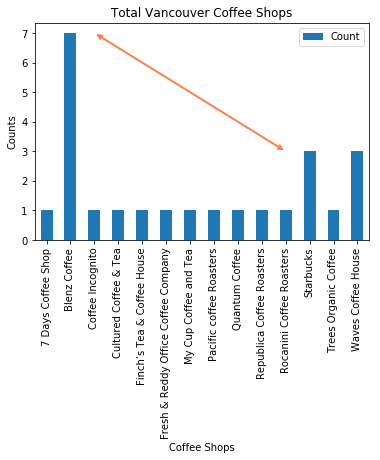

In [24]:
import matplotlib.pyplot as plt
viz_bc = df_show_bc.plot(kind='bar')

plt.xlabel("Coffee Shops")
plt.ylabel("Counts")
plt.title("Total Vancouver Coffee Shops")

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(2, 7),             # place head of the arrow at point (Highest count , pop 7)
             xytext=(10, 3),         # place base of the arrow at point (Highest count , pop 3)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='coral', lw=2)
            )

viz_bc

In [25]:
pb_bc = (7/total_rows_bc)
psb_bc = (3/total_rows_bc)
pw_bc = (3/total_rows_bc)
print("Percentage of Blenz Coffee is :"+"{:.2%}".format(pb_bc));
print("Percentage of Starbucks Coffee is :"+"{:.2%}".format(psb_bc));
print("Percentage of Waves Coffee House is :"+"{:.2%}".format(pw_bc));
print("Percentage of Remained Vancouver Coffee Shops are :"+"{:.2%}".format((total_rows_bc-13)/total_rows_bc))

Percentage of Blenz Coffee is :29.17%
Percentage of Starbucks Coffee is :12.50%
Percentage of Waves Coffee House is :12.50%
Percentage of Remained Vancouver Coffee Shops are :45.83%


Create visual map to locate coffee shops

In [26]:
venues_map_bc = folium.Map(location_bc=[latitude_bc, longitude_bc], zoom_start=15) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Central Public Library
folium.CircleMarker(
    [latitude_bc, longitude_bc],
    radius=10,
    color='red',
    popup='Vancouver Public Library',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map_bc)

# add the Coffee Shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered_bc.lat, dataframe_filtered_bc.lng, dataframe_filtered_bc.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_bc)

# display map
venues_map_bc


### 3. It was interesting to find out there are more franchise coffee shops in Vancouver BC within 500 radius from central library of its cities which was dominated by Blenz Coffee total of 11, followed by Waves Coffee

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://blenz.com/wp-content/uploads/2019/01/OpenYourOwnBlenz-1.jpg")
Image(url= "https://blenz.com/wp-content/uploads/2019/01/OpenYourOwnBlenz-1.jpg", width=750, height=750)

In [28]:
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASERUTEhISEhUVFxUQEBUQEA8PDw8PFREWFhUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dIB8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLS0rLS0tLS0tLS0tLS0tLi0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAFBgMEAAIHAf/EAEAQAAEDAwMCBAMDCQcEAwAAAAEAAgMEBREGEiExQVFhcYETIpEyocEVI0JSYpKx0dIUM0Ny4fDxU4KTohYkg//EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACURAAICAQUAAwACAwAAAAAAAAABAhEDBBIhMUETIlEyYVJxgf/aAAwDAQACEQMRAD8ARXlDqp6uTuQuocg3wJkdIyj5kb6rp1io2uaFzmyw7pR5Lq9hjwApJ2bTctlK9WgFvRc5udGYnkduy7bXQAtXPdU27cDgcpZK0NqsVq0JQXqJU1kld2wiDNLvPcqOxnnrFN9IXVdtNYYpAex4KJS6YkHQ/chVXQPj6hba1yDZODujrWn6/IHKaP7W0DOVxuwXotG0nomR16O3qrpnq4s6cRzqLy0d0Kq9QY7pQFVJIc84Wv8AY5JDyThELyt9BmXURJwDlesr5HeK3tWnx4JopLK0DosNFTfYtCWTzWj6qQeKdBbGeCjmtDD2Cw21/ok/lx7eqv0eos91ZuungQeErVNncw5bkIE25xHukvbT3RSKsa5cvJlaMjsrtvvbuhOChYVm/R3utUA3grmWrbsQNoPJRK437g5KRK6d0shPJ8EspcHNqs/FIqFYiMFlmd2wrP8A8bm/2FLYzgWOb8AhWpRWayTN7ZUFHQuMgaQR4o7WbZK6oKacs+8hxCfIbU0M6KKw0IAAwmKoZhmArpUevhwqMTmGsIA1pwkl4XQtYxZaUgPCN0zkyvbkKrmrRWJGqBwTHbjdo8WLML1AcYalyGSHlXalyr0cBe8Ae/ojNnnZn4H9KUWTux/wunWiHAS1p637WjhOtHFgJUjs08NsSdzchB6y27j0RxoWbAidDVgKks/kiMdqar7VSr68NHVAG1Ip3CmY0cYSNeKUPcR27ole75jgHk8BVKeJzhk90DlytS+qBtBZwXdOAi4oMkDCMU9MGM81kDOc9ytQIYlFEH9kDRgKSKZrSAByp6wbWkoLSzjfkolHwx1oq1rQETgrmuSVPVEDK0t11+fCxTeujorOVHNO1qrUdRlmUt326bSeVrGbrkPy3Bh4S7cKlodgjgqjSVxcorrUAjzQEc+CYQjPkUPrLcA7I6FXrM/cMK3VR9igI4poUrpatw3BDqW3Brs49U8wxBwwUGqqPaSEKITwq7C9lpmkDojv5JaRwkW33Yxv2OOPBO9ruYcOqZHTilFqiCosvkhf5FAdnH3JzDgQonxBEo4Jgy3Uu0KxUDIKs7cKNwRHoSNR02WlcxqY9riPArs93ps5XMNS0BY/cB6pZI87VQ9F5yheFO4KGRFMbTytURr1YsROsLVGScBNGmLP0JHJVOzWsvcCV0a0W4NAWfZywxbpWy1bKLARdrFGZmMCHVV4aO6x2cIMDC94SnLfx4rVt/HigD5IjFX1QaEjaivQaDzypbpfW7TykC4VhleSenZLKVHJqdRSpBSytdPNvdzjp5J3pYOQl3RsHy58U2sGFo9A08frb9J5W59lBSjL1c2/JlU7cfziY6X2eagGGJZt0LiSfNN99iy0LXT9E0nlYWULkA5YZDxg4Xtutbt+eV0A21ngtmUDG8rDfGrK1LEWx48kmahpXud0PVdFIbjCoyUDXrDSjuVCBTwSN6AqO4MeRyF0cWtvghd9t7A0oUI8fAqaWznBR66swAVSsdNiREb7w0IGiqiU6ccZUVdFk5Vq2ty1RTdSFg+CbqmjIbvHBbys01fDw1x5H3o7fafMRXNg4sdkdQUsnRwZZPFk3L07jaq/cOqL9VzHTd7BaMnkdU3R3sY6qiZ6GPKpRsOuCjc1BPy4PFWoLq091im5EtZBuCTdQWzc08J6jma5UrjRAjIRFnDcjhFfTGNxB9lRkXRNU2TIJA9EgVEZacFBcHDjg4TorYWLfcsWs7h/s9YBhNLb01o4KUbXYXO7lMlFp498rMhFz/DJrm9/RRNo5H+KZaKxNHUIk2GNngsU2N9ikywEjJyg13txYOMhdCqa5gHGEj6puLQ0rMnljFREKqlcSQSSoV652TleLmZ47H7Rw/NhMU/CVtFTfKB7Jsq2/Krro9fBzjRepxlnsg8Dtsvuilpky3CGXZm1+fdMVfVhyuj3Myq9nO16sW2UPjVV3yPWG/sbmchQ1BwtLfUBzVWuM2AURyJz+eqIUpSm64fNjCPWqXISgTsM4S9fpc8I5US7WpVqpd70WZ9Elngxkqlf5suARpgDI0ryuMkvugJLhUF7bHiNUc5eUVmwyP2QiiGXZQM/ER3hv5s+i5VU/bd6n+K6jqKUNjPouWSHJJ8yp5Ojzta+UbQTuYctOEw2qWWXulpNOkKludp7IY34R07+9WGm2eTGQStfgys8U720xkYU89BG7phXPW+JeCZS3ZzeqN016a4YJWlfYQegQCqtcjfs5WNcohS8ztLT0XMNSMGchMdZ/aAMYylW6xyZ+YIolKdsC5KxSELE1Ftx3mxRR4HRGzPG3wXMrdfiB3V78pyydAUrB8qGyvvbW9Clqtvjj0yVvTWySTrlF4NPgDJCAG5S6EutvkgHIKWa+vdKeeier/bg0Hhc8lHzH1U5ujz9TuTps0Xqxe4UTjGHSFRtfhdGcNzPZcosT8TN811ei5jHorwfB6ejlcaK9qlw/CsX6HLcofGcS+6O3FuYz6JzqXTQM03U4yD0V+r+HIctefZhP8SEBszHFzsdORkkNaDjxPCYaeKJv2pYx/3bv4AopGi7iWrYBH+k93s1n4lEJAx/VrvZ4/pVOGanH+K32Dj+CuR1dP8Ark+jCjQxA2ywE52v/fb/AEolTUcTOjXfvj+leR1sH6z/APxuU7a2Dxf/AOJy1IxHVULJBjL2+hafwVKHTLAciV3o6MH7w5FRX0/6592OCkZcab/qtHrkLUgMUtVAwtDcg5GQRlBLBBuduKaNZULqlrDTlkhbu3ASMacHGMbiM9ChFkhLGkEEEHDgeCCOoKVoHciO+zYAaoLcz5cqte5cyYV6Lhnsgb0VNZ1eGEeyQkxawnzIB7pdUMj5PI1Mt2RmKehqjG4OHuoF4kXBFOnaHu26mAHVG6XUgPdJenbaH4Pim8acBbkBdMWerhnkcbGKiu7XdVedFG8dkhvpJYjxlWqS+lvDuEx0rL4xkqrQ0joEi6mtgaDwmkahaW9Uo6luwcDymiaTi0c+mbhxWKOaTLisVOCR1OyWQOxwm2jsjW9ku2a7taAi1TqFoHVTZSO1BsujjHZDq29NAIyAlesu0knDcoZU0E7hkuI9Eoksv+KN9SXkEEZSUrlypXsPJJ9VSUMjtnl5puUuT1YsVq30bpXgD3SJWRSt0gjpihL5A7HA6Lp0Pysx5IVYrYI2jhEp3Z4C6Yqkevp8fxxKdLEXSZ80YusoEZUVFCGjJVC5zF52hEt0gbTSsYC5zHP58DtHvlXorywfZgH1j/oVp9uxTPJ64Dvo4H+CExRha2FKkGI9QPHSJv7x/ABTN1FP2jZ+9L/Uh8UStxxBa2Gi03UdT+oz6z/1qQanqv1GfWf+tRRxhSiIIWxkjcarqR1jZ+9P/WpBrCT9KEH/AL3fjlatpwpWUbT2Wtm2oyPVcDiPiQNHiT8Igf8AoCq8NVHI97o/suORnI69fbOVrerc34RwBnhArTPsdg9EeRW6dGXiMiTKIRnLPZe3GHeMhVqN+OFgVTEHV1MRJu7dEurqV/tgkYeFzWupTG8tPso5I+nlanE4yv8ASuvFixSOYa9H1wbwexXTrfXsLecLhdNK5rvl6pnoLtUNHLTjyKvB8HoabUUtrOpz0scg4wgFy0+D0H0Q+2ai6ZyPVNFJdGOHOFQ704zQhV1ie3JBKTr3TyN6ldruLoy0rlusC0A4TRROWNREclYoi9YjQ9obqMyk4aUzWyzSPwXElULCxuRlP1BNG1vZaSIxxp9mtusrWjkK1XwRtb2VCvvrWjgpYuOoXOyACfRKPKcYoF6tLe3ilhXLlUue75gR6qmoT5Z5OWW6VmzGkkAd10DS1oDWgkcpS07T75R5LqVDEGsTY16dOkxX9mbSODRhbUsWeVQMm9+PNG3gRx58lQ9BclG41W0bQvLVR7juKExPMsvum0ARx56YGT5cLAj9nZUvFS1sbm+II+5LsZAIz3Qy+3re4tb0I69MqnBWEjBP/KSUn4dWPGne4cowvKuvihZvkcGt8+58AO5UEc4DNzjgAZcfAAZK53qCpmmkbI8Ha9u+Bo5DYiePfjn/AIVErOLUZviXCsan62LnbYKd8h56k7iB32tBOFYqNXTwP21FKQM43Me7B4B+Uubh3XxQ6z09EGxOa5z5QQ+P4THulB67Jgzg4OeeMgeCJV0NO92atxbNs2Rumgkjp28n59u4tLhnu7HA6I8HMpZXG9yv/lDJY73BUtzE7kfaa7h7PUfiOEciXFLSJG1TTS7uC4xmTjfG0Eu3YHQgHjzHddhtFY2aJkjej2hw8RkdD6dEGqOjTZ3lX27RHqG4/AjacA7nbcOAIxtP+iA3Olxh4GAQHY/VzzhE9Ulm+AOGcF7wO2RtAJ+pVueISR+ySubOqcoygopcoDW6p3Daeq9qYdpyEIc8xS+6ZmsEkefJMRi7VFWNwcMJS1XZ9wJA56hH2S7H4PorVfCHMQFnBTi0zjLm4OCvEU1DS7JT5oWueSpnjSjtdBTT8AfJgrpdssrS3oFyy11Xw35XRrJqBuByPqqw6O7SONUyS56dxyBj0S/LJPAe5C6DBcGSDsq9dbWPHZUOyWNPmJz2p1OcYOR6pRvVyMhTpqO1Nbnhc7rW7XEJkIlK6ZW2rF7lYjZShvhqiwolBeHu4bkoLIMph07StyMppIhy3SCFBapJTl2Uadp9rW9EVpJI2M7KjXXtv2QQpldkYrkSdRWzAO0cjwCDUlnlefs49V0enpvinplGKaxAdkrgmc8tKpysVdNWD4fbJPUpvqKfaz2RSkt7W9lJcIMtTUdcMagqQlW0/neUevH90gMjSyX3TC785H6hAEfULFh/vDnxRbW9XspTg8uLWD35P3AoXCwxy+6o68uAeY4h+j87/wDMRwPpn6oPoOH8FV7s+qs28bnho8fm/kqwYiGnGAlxH62PuCRI6ZSaQw3aNzqZzWhx3bWEMAc/YXAOwD+zlBLnfHNDII/hxA7Yy6OYSSxRA7S12BhrvQnoUfr4g6B4w08bsPDy35TnkM+Y9OgSXLQulnJc1/w2MDnExthAY1uQ0BvDAegzyAclWR5mocl/H0YbfRtc5rN7oRy38zgO3OYza3of04qgDvkeav1sIcWv+JK4vyfhytwGbnCOPhzQ4fPtPPHyuKgt9E2aTY7BBL3ydRubFUPyB3GZXuPXhoaOpKv3O1shc0xj+8w0hz3uJkibJI0lziTtLd7T4ZaR0WAovbdAq0350EzoAYzGQ2SP48hibHujDnNDsHGc9DgBOukoNkO3Y5jQ9+xrywlrHPLgMtJBA3EAg9AueVNA8VEU0Qlw5zWuc1rNzX7Gn9P5QS17eDxu3BdI03GI6dvDW53PwyJ0A5cSMxk5acYyPHOEGNpXJyafl1/oqaroZpJ4tjC4NYScEDku8zyeEUt4Pw8H70m3S9v+PIdx+0Wj0HCYrTcS+Aud1ztz4kNGfXnPvlSjNt0epkwRhHen2LmoR+cGPFMlk/uuUsVZ+JL7pqpcMj9k5xQ7bAF44l4RenjLox6IHUO3y+6b7ZB8nPgiGHLZzPVtpc45b1BSXLGWnBGPVd2uNqDuyVrjptrurfuSShZy59JudxOfWugMp8k0Q6bOMtyPRXaG0NgPTCa7dNGRg4RjGg4dOkvt2JDJpoDzkhF6bUo29UeuNsY8HgLnmobWYyS0keidFWpQ6LGoLw1wK55VHc4lTVVQ7OHFVw4ItlI88si2LFKSFi1jbRjertvuWxU3qvKFU5W6Gf8ALbn/ACt5V+2Wh73B7slB9OQtyCU/0tQxrewUpIeMd3MgvaKVrQEbaEo097bnAKP0twaRysjoTXgRC1mcMHKHz3Ro7oDc78ADytZnJLsp6hlDXZVuwVoc3GUh3u+GUlrOfNXtJ1bmENcUlnIs6eSkN94pgPn6Acn0C51VTGSRzj1JJ9uwTtrC5gQtjafmk5d5Rj+Z/gUkx+YPtn8Esmd0I+msjeFb0sftj9vP1aP9VE9reoB98/ipNOu/OyDyaf4rR7Hn/EcqdLl4gqIAYoSxsUrjucWj5A5p35PJPDXFzneIwmKAq4I2uBa4BwIwQ4Agg9iFQ5Jw3KuhYtznh7C3JcHwNbu+0XvBMzXf/gI3O/aAPVE7+8/GO/7AZER4fAdNipP0+GD+yT4lE6e0xtkbIMgtMpxnLS6Ugvcc85+VXKy2xylpfn5Q9uAcBzZGbXB3lhaxVie2hTskFXI99O8h0LjvlLmNdtcXn4jeRyC9jxjr8zXDhPxaAzHQAY9AAq8NGxoaANu05G0kZOMfNj7XQdfBRX2UiF+P1SB64QbK4cezt2J9Jp9sk75ZJ/kc4uEbW4PJ4G7Pf07o5dahrWCOPAaBhobwAO2Emx3E8cnx4658EdomukLQevfy8lOF2dercaW0u2ejydxVm81ga3GVecBGxIOqLi4nDeqocGSSxxGGxtDn5TvE3AC5Zpy8NGATgp7obsCOSsmNhmpR4DJKjfE09lqydp7rJZQAiXAV5ouCQkmetmhk8WroFRUtdxlCbjbWPaeixDJC+UUqHUQLeSgeo7ixzScoNfIHQklp9kr1lwe/gpoiKbfDKlZLl5wody92rzaiOrPcrxe7ViAw1vUEisPUEioc0iSiuXw0Sbe3P+VpSxUq9p54DuUJIyuqHix0DvtEk9yi9TcBG1U6C5ta3lBb3c95LW8+ik1Q7ahHg0rtVnkDJS/WXOSTqcDwCinpJByQq7GknA6nhRk2ebkyTl2GNN0295TQyj2EFbaStO1mSFJqKsaAWM5P6RHQDwCdfVHfp8D2oCXCpMjy4+jf8o4GFWZ/vnB+hUXxvH6cEfRbscPT/MMj/RKeh1wbzO4/4UWnpv8A7Rb4sP3OH81vIeO3tz+KoWqTFZH57mnyBaT/ABARXZpdHSICr8JQ6m6IhCqMgi/GVYYVViVloSjonaFVusO6M+hKuRKjqSbZTSu/Yd/BEZdiNDZGxMMgPxSOrgMMZk9QDyfVMmmqfI3FKUFyyS0nggjg45Ttppw2JIBzxSyJp3wQ6inwMJMmoi8kpt1Ow5Q+iiBanOTJHdKjnlyBil4OCETtepXNwH/Vb6voCHbwPX0SwVJtxZ5snLFN0dPoNSNPR33oq6vL29Vx+nkLXA8roGn6kOAyVSMrO3Bnc+GRXW4SxuyMkd1Yp9QhzcEq9eIGFvZc1vEhif8AKeE6RR7osL6krmuB5SU7kqeaoc/qVGQqB9IitVIVoUhRGYWL1eoDUNDlDIp3KCRVOWQOqVWgmLDkK1UKk4LBiFI7s88AprsFI0jJ5KQKfgpvtV0DWhK0alfIdudM0NKG6bsu+TcR348go5rmZXBoR5s3wo9reCRye/ooypBhhWWfHhculzbG34UXo5w/gEtzvz1WSE55Xhb3Urs9FJJUik6PC3azPRTubn0UbGYPr0RBRq6nce/HjgAqtDCI5mO8HDJJ8+ST6ItjhU5o8lELSob6WuhxzI36q9Hc4B/iN+9c7+GMdF58EeH3JtxLYdOjvFOP8QfR38lM2+03/VH7r/5LlfwR4BF9N6clqj8o2sHDpCMt9Gj9IrWbb/Z0FupKMdZm/R/8lWvVXHV00kVM74r3ANAaHAckdXEYH1Qi46aghb8rNx7uf8xPt0V/TNZj5emOPBETfUqAZ0uYGbnndJjt9lnkPE+aK6Yq8HafRNV0pQ9mUhnMMvusTm2pbhsvlPvZlL1udg7SmijlEkfslm5wmOTKIZ/ptercJGHhc1qbcWy7D0zx6Lr1HIJGJT1Tb9p3AdOUGrOfUYlJbgZSWVpb0VSpa+mdkE47jwRq23Jm3zQzUFQHBOomWONWjV1/3N5KVrtUb3KQRKCZmFRDbio1q9cFsAvHIsZEJWq3ctFIqj1YvViww0OUMixYqnKwfUKo4L1YsFHkQV+EcL1YsJMaLRbfgje/l56DqGD8SrshyvFi4JSbds9eEFCNIjLF41oWLEUBkWMKCby9R+IWLEwh7HUcLHuC8WImsg3ZIA5JOB5lNFu0TO/DpnNib4DEjyPY4H1K8WJkrYljXbtKUcWD8P4hHeU7/wD1+z9yYYmAcAYHYDgALFiegMH3qmDmlI0Ehimx5rFiDIZfGdAt0u+P2SlqmkwchYsWGnzE20xXZ4Por2oYNzcrFiwseYAC0XDYS0rL/VBzCsWJkhU/qc8fI5rzg8ZXrnud1KxYnRHozHCpVC8WJjLsrLV6xYsVIitVixSKoxerFiw5/9k=")
Image(url= "https://wavescoffee.com/wp-content/uploads/2017/02/X9A3129-Edit.jpg", width=750, height=750)